# Mathematik für Biologiestudierende II

Sommersemester 2025

24.06.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Themen

* Multikollinearität
* Konditionszahl
* Lineare Modelle mit kategoriellen Daten

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()
import statsmodels.formula.api as smf

# Multikollinearität

* eine Menge von Größen ist *kollinear*, wenn sich eine von ihnen linear aus den anderen bestimmen lässt
* "linear" heißt durch Addition und Multiplikation mit Skalaren 

In Lektion 25 gesehen:

> midparentHeight = (father + 1.08 * mother)/2

* also sind `father`, `mother` und `childHeight` kollinear
* Multikollinearität im statistischen Sinne liegt bereits dann vor, wenn eine Gleichung wie die obige fast zutrifft

* eine Maßzahl für Multikollinearität ist die Konditionszahl

# Konditionszahl

In [2]:
df = pd.read_csv('galton.csv')

In [3]:
formel = "childHeight ~ father + mother"
model = smf.ols(formel, df)

In [4]:
res = model.fit()

In [5]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     74.62
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           6.25e-29
Time:                        14:15:37   Log-Likelihood:                -1080.7
No. Observations:                 481   AIC:                             2167.
Df Residuals:                     478   BIC:                             2180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3128      4.095      4.716      0.000      11.266      27.359
father         0.4176      0.046      9.154      0.000       0.328       0.507
mother         0.3288      0.045      7.258      0.000       0.240       0.418
==============================================================================
Omnibus:                       10.653   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.542
Skew:                          -0.200   Prob(JB):                     0.000695
Kurtosis:                       3.752   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* `condition number` bedeutet Konditionszahl

* Um das Modell zu berechnen, muss ein lineares Gleichungssystem gelöst werden
* Je größer die Konditionszahl, umso schwieriger ist die Berechnung der Lösung
* Für den Nutzer bedeutet das, dass die ausgegebenen Werte mit Unsicherheiten behaftet sind
* und im Extremfall sogar falsch

* eine Konditionszahl von 4000 ist aber noch nicht besorgniserregend groß

#### Ein nicht statistisches Beispiel mit schlechter Konditionszahl

Wir betrachten das Gleichungssystem
$$
    \begin{aligned}
        x + y &= 1 \\
        x + 1.0000001 y &= 1.001
    \end{aligned}
$$


Die Lösung ist
$$
    x = -9999, y = 10000
$$

* Die Konditionszahl des Gleichungssystems kann mit `numpy` ausgerechnet werden
* Sie beträgt 40000001.9

* Modelle mit schechter Konditionszahl müssen vermieden werden
* Wenn das Gleichungssystem aus dem Beispiel aus der Biologie käme, dann wären die Zahlen Messwerte
* also mit Unsicherheiten behaftet

* In einem System mit schlechter Konditionszahl führen winzige Messungenauigkeiten bereits zu völlig unsinnigen Ergebnissen

#### Beispiel mit wirklich schlechter Kondition

In [6]:
formel = "childHeight ~ father + mother + midparentHeight"

In [7]:
modell = smf.ols(formel, df)
res = modell.fit()

In [8]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     74.62
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           6.25e-29
Time:                        14:15:37   Log-Likelihood:                -1080.7
No. Observations:                 481   AIC:                             2167.
Df Residuals:                     478   BIC:                             2180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.3128      4.095      4.716      0.000      11.266      27.359
father              0.2923      0.040      7.361      0.000       0.214       0.370
mother              0.1935      0.038      5.055      0.000       0.118       0.269
midparentHeight     0.2506      0.021     12.091      0.000       0.210       0.291
==============================================================================
Omnibus:                       10.653   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.542
Skew:                          -0.200   Prob(JB):                     0.000695
Kurtosis:                       3.752   Cond. No.                     1.15e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.98e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> midparentHeight = (father + 1.08 * mother)/2

* Daher kann man aus diesen drei Größen beliebig viele unterschiedliche Modelle bauen, die alle dasselbe vorhersagen
* Andererseits ist das Modell enorm empfindlich gegenüber Änderungen der Ausgangsdaten

* Wir ändern die Daten um ein winziges bisschen
* Wir machen alle Mütter um 3µm kleiner

In [9]:
df['m1'] = df.mother - 0.0001

In [10]:
f1 = "childHeight ~ m1 + father + midparentHeight"
m1 = smf.ols(f1, df)
r1 = m1.fit()

In [11]:
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     49.55
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           6.80e-28
Time:                        14:15:37   Log-Likelihood:                -1080.8
No. Observations:                 481   AIC:                             2170.
Df Residuals:                     477   BIC:                             2186.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.36e+07   3.78e+07      0.359      0.719   -6.08e+07     8.8e+07
m1                1.36e+11   3.78e+11      0.359      0.719   -6.08e+11     8.8e+11
father           1.259e+11    3.5e+11      0.359      0.719   -5.63e+11    8.14e+11
midparentHeight -2.519e+11   7.01e+11     -0.359      0.719   -1.63e+12    1.13e+12
==============================================================================
Omnibus:                       10.752   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.794
Skew:                          -0.199   Prob(JB):                     0.000613
Kurtosis:                       3.762   Cond. No.                     9.71e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.98e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Ein offenkundig sinnloses Modell

Das Problem ist, dass Multikollinearität in der Praxis häufig verborgen ist

# Lineare Modelle mit kategoriellen Daten

In [12]:
df = pd.read_csv('kinder.csv')
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


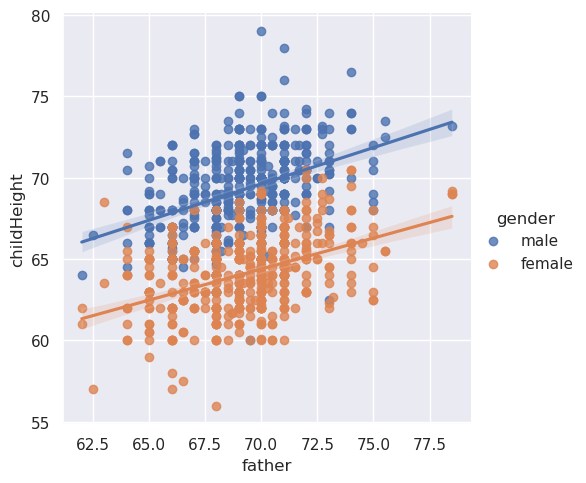

In [13]:
sns.lmplot(df, x='father', y='childHeight', hue='gender');

In [14]:
formel = 'childHeight ~ father + mother + gender'
modell = smf.ols(formel, df)

In [15]:
res = modell.fit()

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     540.3
Date:                Wed, 18 Jun 2025   Prob (F-statistic):          3.38e-203
Time:                        14:15:37   Log-Likelihood:                -2044.6
No. Observations:                 934   AIC:                             4097.
Df Residuals:                     930   BIC:                             4117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.5212      2.727      6.058      0.000      11.169      21.873
gender[T.male]     5.2150      0.142     36.775      0.000       4.937       5.493
father             0.3928      0.029     13.699      0.000       0.337       0.449
mother             0.3176      0.031     10.245      0.000       0.257       0.378
==============================================================================
Omnibus:                       11.156   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.397
Skew:                          -0.114   Prob(JB):                     0.000453
Kurtosis:                       3.586   Cond. No.                     3.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hier wird eine Fallunterscheidung kodiert

$$
    \text{childHeight} = 16.5212 + 0.3928 \cdot \text{father} + 0.13176 \cdot \text{mother} + 
    \begin{cases}
        0.0 & \text{wenn Mädchen,} \\
        5.215 & \text{wenn Junge.}
    \end{cases}
$$

Die Terminologie kommt offenbar aus der Pharmazie:

* `female` ist hier der Standard (engl. "default")
* alles, was vom Standard abweicht, ist eine Behandlung (engl. "treatment")
* daher `T.male`
* was default und was treatment ist, entscheidet das Programm

## Prediction im kategoriellen Fall

Beispiel aus Lektion 25

In [17]:
anfrage = pd.DataFrame()
anfrage['father'] = [68.9]
anfrage['mother'] = [66.4]
anfrage['gender'] = ['male']
anfrage

,father,mother,gender
0,68.9,66.4,male


In [18]:
res.get_prediction(anfrage).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,69.892443,0.123415,69.650239,70.134648,65.6373,74.147587


* In Lektion 25 war 69.91 herausgekommen
* Dies ist kein Rundungsfehler
* Es wird eine gemeinsame Steigung für alle Kinder berechnet

#### Beispiel Ratten

Wir kommen zu dem Rattenbeispiel aus Lektion 23 zurück:

* kontaminiertes Gelände: fange 10 Ratten
* unbelastetes Vergleichsgelände:  fange 10 Ratten
* für jede Ratte wird ihr Alter in Monaten und der Bleigehalt im Gewebe bestimmt

In [19]:
df = pd.read_csv('ratten.csv')

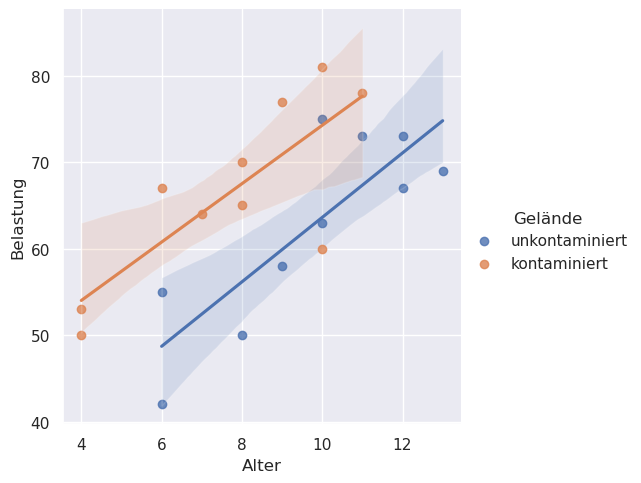

In [20]:
sns.lmplot(df, x='Alter', y='Belastung', hue='Gelände');

* Der t-Test zeigte keinen Unterschied zwischen den Ratten auf kontaminierten und nicht kontaminiertem Gelände.
* Die Ratten auf dem kontaminierten Gelände sind aber im Schnitt jünger.  
* Wir wollen gleichaltrige Ratten vergleichen

In [21]:
formel = 'Belastung ~ Alter + Gelände'
modell = smf.ols(formel, df)
res = modell.fit()

In [22]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Belastung   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     17.52
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           7.42e-05
Time:                        14:15:38   Log-Likelihood:                -63.935
No. Observations:                  20   AIC:                             133.9
Df Residuals:                      17   BIC:                             136.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    39.1728      5.166      7.583      0.000      28.273      50.072
Gelände[T.unkontaminiert]   -11.0980      3.124     -3.552      0.002     -17.689      -4.507
Alter                         3.5490      0.617      5.752      0.000       2.247       4.851
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.408
Skew:                          -0.346   Prob(JB):                        0.815
Kurtosis:                       3.102   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* `Gelände[T.unkontaminiert]` ist signifikant
* Allerdings ist das der Unterschied bei Alter = 0
* Das ist Unsinn

* Wir vergleichen im Alter von 8 und 9 Monaten

In [23]:
anfrage = pd.DataFrame()
anfrage['Alter'] = [8,8,9,9]
anfrage['Gelände'] = ['kontaminiert', 'unkontaminiert', 'kontaminiert', 'unkontaminiert']
anfrage

,Alter,Gelände
0,8,kontaminiert
1,8,unkontaminiert
2,9,kontaminiert
3,9,unkontaminiert


In [24]:
res.get_prediction(anfrage).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,67.564695,2.037898,63.265107,71.864283,53.358146,81.771244
1,56.466728,2.284487,51.646882,61.286575,42.094168,70.839289
2,71.113678,2.182221,66.509596,75.717761,56.812030,85.415327
3,60.015712,2.074920,55.638014,64.393409,45.785328,74.246095


* Relevant sind hier die Konfidenzintervalle für die Mittelwerte
* Alter = 8 Monate
  * untere Vertrauensgrenze für Bleibelastung auf kontaminiertem Gelände: 63.27
  * obere Vertrauensgrenze für Bleibelastung auf unkontaminíertem Gelände: 61.29
* Zum Signifikanzniveau $\alpha = 0.95$ ist der Unterschied in der Bleibelastung signifikant

* Für das Alter von 9 Monaten gilt das genauso

In [25]:
res.get_prediction(anfrage).summary_frame(alpha=0.02)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,67.564695,2.037898,62.333546,72.795844,50.280117,84.849274
1,56.466728,2.284487,50.602601,62.330856,38.980170,73.953287
2,71.113678,2.182221,65.512062,76.715294,53.713396,88.513961
3,60.015712,2.074920,54.689530,65.341893,42.702135,77.329289


* Für das Konfidenzniveau $1-\alpha=0.98$ ist die untere Vertrauensgrenze für Bleibelastung auf kontaminiertem Gelände immer noch größer als die obere Vertrauensgrenze für Bleibelastung auf unkontaminíertem Gelände
* Der *p*-Wert ist also kleiner als 0.02